In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from os import listdir
from os.path import isfile, join
import multiprocessing as mp
import concurrent.futures
from obtain_bars import download_dfs_get_bars
from fractional_differentiate import fracDiff_FFD, plot_frac_actual_price
from statistic_tests import plotMinFracFFD, adf_test

In [2]:
data_dir = 'C:\\Users\\Masa\\Desktop\\Financial ML\\DATA\\AAPL_10year_data\\'
file_names = [f for f in listdir(data_dir) if isfile(join(data_dir, f))][:-2]

### First, I must create whole bars then create fractional differentiation. Otherwise, the fractional differentiation data is not continuous because when I process diff frac, I drop the data. Look the shapes below.

In [27]:
%%time
# Use multiprocessing to read_csv -> process data(get bars) -> create list of patial dfs
from functools import partial
if __name__ == '__main__':
    bar_type = 'dollar'
    size = 100_000_000
    symbol = 'AAPL'
    bars = []

    pool = mp.Pool(16)
    
    download_func = partial(download_dfs_get_bars, bar_type, size, data_dir, symbol)
    dfs = pool.map(download_func, file_names)
    pool.close()
    pool.join()
    
    for bar in dfs:
        bars.append(bar)

CPU times: total: 250 ms
Wall time: 13min 48s


In [28]:
total_length = 0
for i in range(len(bars[:-1])):
    print(f'bar df shape #{i}: {bars[i].shape}')
    total_length += bars[i].shape[0]
print(f'Average bar length: {total_length / len(bars)}')

bar df shape #0: (1060, 15)
bar df shape #1: (720, 15)
bar df shape #2: (887, 15)
bar df shape #3: (1060, 15)
bar df shape #4: (1555, 15)
bar df shape #5: (1497, 15)
bar df shape #6: (1351, 15)
bar df shape #7: (826, 15)
bar df shape #8: (1117, 15)
bar df shape #9: (1228, 15)
bar df shape #10: (1007, 15)
bar df shape #11: (738, 15)
bar df shape #12: (1219, 15)
bar df shape #13: (1114, 15)
bar df shape #14: (1331, 15)
bar df shape #15: (1011, 15)
bar df shape #16: (809, 15)
bar df shape #17: (1043, 15)
bar df shape #18: (1356, 15)
bar df shape #19: (2061, 15)
bar df shape #20: (1606, 15)
bar df shape #21: (1745, 15)
bar df shape #22: (1177, 15)
bar df shape #23: (827, 15)
bar df shape #24: (968, 15)
bar df shape #25: (1960, 15)
bar df shape #26: (3048, 15)
bar df shape #27: (3178, 15)
bar df shape #28: (2149, 15)
bar df shape #29: (1530, 15)
bar df shape #30: (1790, 15)
bar df shape #31: (1820, 15)
bar df shape #32: (2080, 15)
bar df shape #33: (2604, 15)
bar df shape #34: (2455, 15)
ba

Addjust for price split found out the website. <a href="https://www.stocksplithistory.com/apple/">Split history</a>

This case September, 2020 and October 2020 affects the change and I just change mannually. 

In [29]:
# Manually change 2020 Sep and 2020 Oct 
num = [-9, -10] # 2020 september, 2020 October 
for i in num:
    bars[i][['Open', 'High', 'Low', 'Close']] = bars[i][['Open', 'High', 'Low', 'Close']] * 4
    bars[i]['Volume'] = bars[i]['Volume'] / 4

In [30]:
bars[-10]

,Datetime,Tick,Symbol,Num of Tick,Open,High,Low,Close,Volume,Buy Volume,Dollar Traded,Cum_ticks,Cum_Volume,Cum_Buy_Volume,Cum_Dollar_Traded
0,2020-09-01 10:14:59.562,59525,AAPL,9526,131.00,131.04,130.7700,130.9000,762573.0,899280,9.984736e+07,9526,3050292,899280,9.984736e+07
1,2020-09-01 10:16:51.200,68707,AAPL,9182,130.89,131.10,130.7000,130.9400,764805.0,1238580,1.001525e+08,18708,6109512,2137860,1.999999e+08
2,2020-09-01 10:18:37.292,76892,AAPL,8185,130.93,131.35,130.8800,131.2700,762636.0,1510044,9.998663e+07,26893,9160056,3647904,2.999865e+08
3,2020-09-01 10:21:01.200,86365,AAPL,9473,131.27,131.49,131.1163,131.4400,761249.0,1297000,1.000112e+08,36366,12205052,4944904,3.999977e+08
4,2020-09-01 10:22:13.612,92746,AAPL,6381,131.44,131.88,131.2389,131.7100,756081.0,1621280,9.958028e+07,42747,15229376,6566184,4.995780e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,2020-09-30 15:58:13.561,28956462,AAPL,5331,116.19,116.20,116.0000,116.1301,861292.0,1754660,1.000018e+08,775915,486346420,238748696,1.410001e+10
3933,2020-09-30 15:59:13.177,28961652,AAPL,5190,116.13,116.19,115.9300,115.9300,861044.0,1906936,9.996223e+07,781105,489790596,240655632,1.419997e+10
3934,2020-09-30 15:59:47.494,28966708,AAPL,5056,115.93,115.94,115.7700,115.8600,863428.0,1643232,1.000372e+08,786161,493244308,242298864,1.430000e+10
3935,2020-09-30 15:59:59.035,28969580,AAPL,2872,115.85,115.86,115.5800,115.6100,864153.0,1527296,9.999292e+07,789033,496700920,243826160,1.440000e+10


In [31]:
full_bars = pd.concat(bars, ignore_index=True)

In [32]:
full_bars.tail()

,Datetime,Tick,Symbol,Num of Tick,Open,High,Low,Close,Volume,Buy Volume,Dollar Traded,Cum_ticks,Cum_Volume,Cum_Buy_Volume,Cum_Dollar_Traded
186250,2021-06-04 15:54:26.360,1970877,AAPL,5017,125.9300,126.0100,125.8841,126.01,793631.0,466084,9.998076e+07,434943,62269747,32123761,7.799981e+09
186251,2021-06-04 15:56:05.914,1975821,AAPL,4944,126.0100,126.0500,125.9000,125.92,776695.0,345561,9.783101e+07,439887,63046442,32469322,7.897812e+09
186252,2021-06-04 15:58:30.061,1981385,AAPL,5564,125.9300,125.9569,125.8400,125.85,811216.0,411445,1.021117e+08,445451,63857658,32880767,7.999924e+09
186253,2021-06-04 15:59:54.858,1986166,AAPL,4781,125.8400,125.9149,125.8101,125.89,793256.0,432527,9.984044e+07,450232,64650914,33313294,8.099764e+09
186254,2021-06-04 15:59:59.976,1986674,AAPL,508,125.8802,125.9000,125.8400,125.88,144502.0,84757,1.818771e+07,450740,64795416,33398051,8.117952e+09


In [33]:
print(full_bars[['Open', 'High', 'Low', 'Close']].describe())

                Open           High            Low          Close
count  186255.000000  186255.000000  186255.000000  186255.000000
mean       45.387971      45.493678      45.235819      45.350118
std        40.277474      41.174065      37.624601      38.584926
min         6.800154       6.811429       0.903571       6.801429
25%        18.729286      18.750150      18.705357      18.728929
50%        28.227475      28.270000      28.175000      28.227500
75%        60.047500      60.200000      59.876250      60.048775
max      3571.428568    3571.428568     144.650000    3571.428568


Noticed that the max number is way to high. Instead of farther investigation, I will drop the outliers. 

In [34]:
out_open = full_bars.loc[full_bars['Open'] == full_bars['Open'].max()].index
out_high = full_bars.loc[full_bars['High'] == full_bars['High'].max()].index
#out_low = full_bars.loc[full_bars['Low'] == full_bars['Low'].max()].index
out_close = full_bars.loc[full_bars['Close'] == full_bars['Close'].max()].index
out_index = list(set(out_open.append((out_close, out_high))))
full_bars.iloc[out_index]

,Datetime,Tick,Symbol,Num of Tick,Open,High,Low,Close,Volume,Buy Volume,Dollar Traded,Cum_ticks,Cum_Volume,Cum_Buy_Volume,Cum_Dollar_Traded
4016,2010-05-06 15:50:50.613,636274,AAPL,2156,3571.428568,3571.428568,8.751129,8.875714,11168360.0,5681900,1.192857e+08,240367,1203470072,585924612,1.079998e+10
4013,2010-05-06 15:46:30.970,630087,AAPL,1583,3571.428568,3571.428568,8.722143,8.752500,7565572.0,3308984,1.355407e+08,234180,1171847684,568638448,1.049998e+10
4006,2010-05-06 15:30:59.867,614375,AAPL,2194,3571.428568,3571.428568,8.612318,8.744782,10484796.0,5480048,1.607736e+08,218468,1099656572,532685608,9.799999e+09
4005,2010-05-06 15:29:30.893,612181,AAPL,442,8.673214,3571.428568,8.656143,3571.428568,2219560.0,1313788,3.922935e+07,216274,1089171776,527205560,9.639226e+09


In [35]:
full_bars.drop(out_index, inplace=True)

Check again for outliers. 

In [36]:
print(full_bars[['Open', 'High', 'Low', 'Close']].describe())

                Open           High            Low          Close
count  186251.000000  186251.000000  186251.000000  186251.000000
mean       45.331373      45.417954      45.236604      45.331775
std        37.709904      37.793302      37.624624      37.710092
min         6.800154       6.811429       0.903571       6.801429
25%        18.729286      18.750055      18.705893      18.728929
50%        28.226250      28.268950      28.175000      28.227500
75%        60.042500      60.197500      59.877500      60.048775
max       144.930000     146.250000     144.650000     144.930000


Successfully dropped the outliers. 

Now Iam going to plot the price movement. 

In [37]:
full_bars_prices = full_bars.set_index('Datetime')
full_bars_prices = full_bars_prices[["Open", "High", "Low", "Close", 'Volume']]

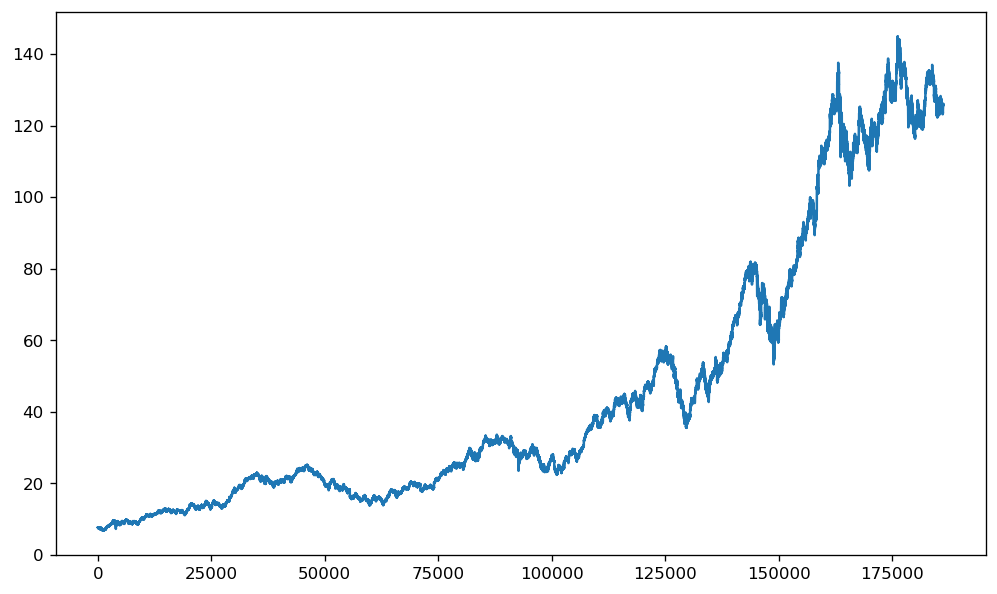

In [38]:
plt.plot(range(len(full_bars_prices)), full_bars_prices['Close']);

Plot the volume of the trading.

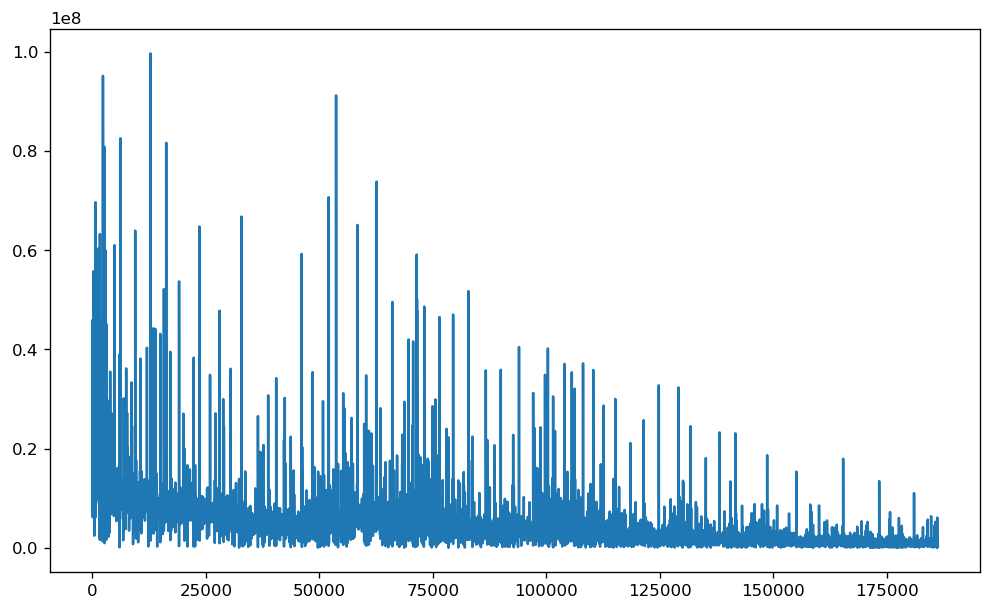

In [39]:
plt.plot(range(len(full_bars_prices)), full_bars_prices['Volume']);

<a href="https://www.amazon.ca/Advances-Financial-Machine-Learning-Marcos/dp/1119482089">Advanced in Financial Machine learning Chapter 5</a>

From the book, the reason to get fractional differenciation is to keep the memory of the data and get the data stationary at the same time. 



       adfstat         P-val  Lags    n0bs  95% conf      corr
0.0   1.599791  9.978569e-01   1.0  2872.0 -2.862547  1.000000
0.1   1.025295  9.945258e-01   1.0  2867.0 -2.862549  0.999937
0.2   0.155037  9.696239e-01   1.0  2864.0 -2.862550  0.999490
0.3  -0.789061  8.223144e-01   1.0  2863.0 -2.862550  0.998123
0.4  -1.792585  3.841490e-01   1.0  2864.0 -2.862550  0.995282
0.5  -3.058207  2.980465e-02   1.0  2865.0 -2.862549  0.989079
0.6  -4.822244  4.930047e-05   1.0  2866.0 -2.862549  0.975307
0.7  -6.778038  2.541040e-09   1.0  2867.0 -2.862549  0.953951
0.8 -10.758518  2.556159e-19   1.0  2867.0 -2.862549  0.891081
0.9 -15.952154  7.336307e-29   1.0  2869.0 -2.862548  0.784432
1.0 -40.062526  0.000000e+00   1.0  2871.0 -2.862547  0.057092


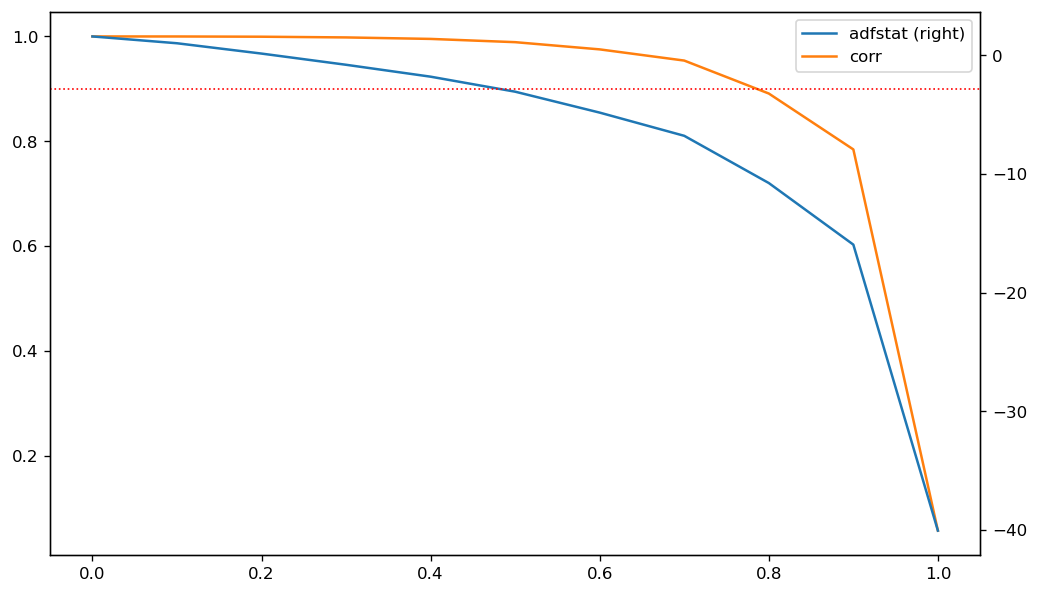

In [16]:
plotMinFracFFD(full_bars_prices, thres=1e-2)

From the test, it showed 0.5 differentiation is the best spot. adftest result is -3.058207, p-value is 2.980465e-02 and this data is stationary. At the same time, the correlation between the actual price is 0.989079, and it tells that the memory is still there. 

I will go with 0.5 differentiation to create the dataset. 

In [18]:
%%time
data = full_bars_prices[['Open', 'High', 'Low', 'Close']]
frac_df_ffd = fracDiff_FFD(data, d=0.5, thres=1e-2)

CPU times: total: 31min 33s
Wall time: 31min 33s


The result of statistic test after I differentiate the price. 

In [19]:
adf_test(frac_df_ffd["Close"])

Test Statistic: -3.315530046860838
p-value: 0.014198393086062725
#Lags Used: 1
Number of Observations: 186170
Critical Value (1%): -3.4303851259073275
Critical Value (5%): -2.86155552517991
Critical Value (10%): -2.566778263496204

Result: The series is stationary


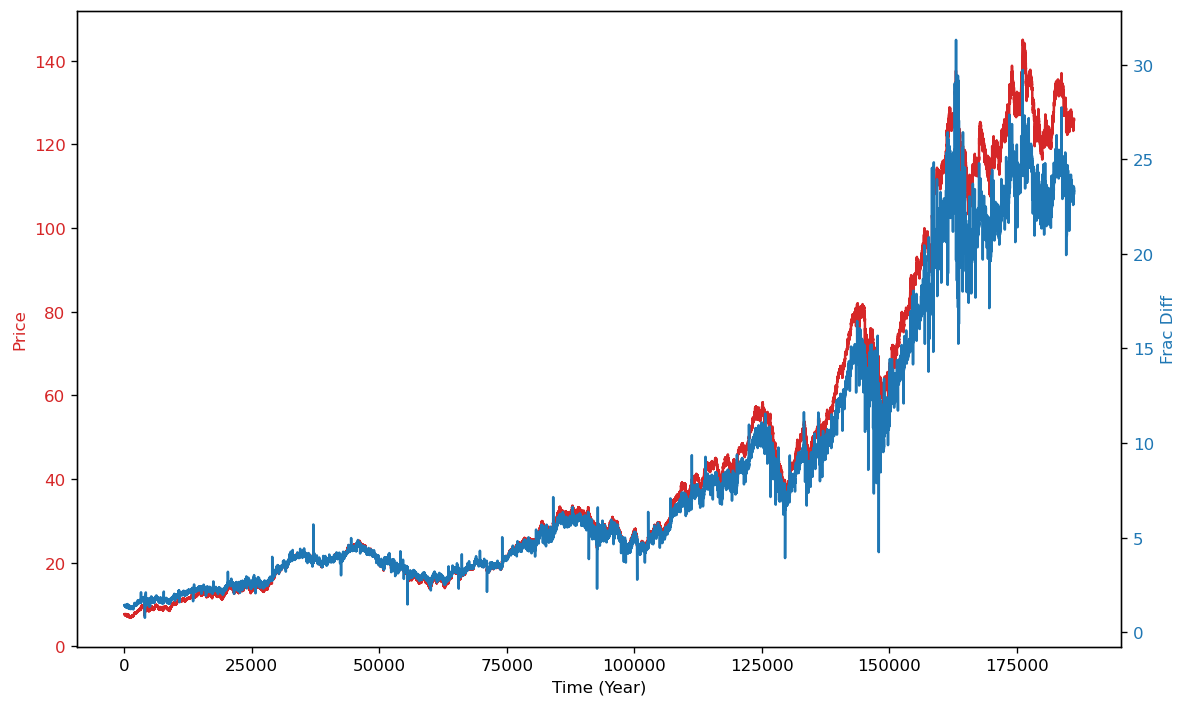

In [20]:
plot_frac_actual_price(full_bars, frac_df_ffd, len(frac_df_ffd), 'Close')

Concurrent futures: https://docs.python.org/3/library/concurrent.futures.html#module-concurrent.futures
multiprocessing: https://docs.python.org/3/library/multiprocessing.html#multiprocessing.pool.Pool
 
https://linuxhint.com/pandas-read-csv-multiprocessing/

# Process to adjust price split. 

## Next project is to adjust stock splits 

Apple's stock price split had happened twice this time period. 
* First: 2014/06/09 7 to 1 split
* Second 2020/08/31 4 to 1 split

Result should be the numbers:

    divided by 28 (7 x 4) up to 2014/06/08.

    divided by 4 between 2014/06/09 to 2020/08/31

In [14]:
header = ["Datetime", "Price", "Volume", "Exchange"]
df = pd.read_csv(data_dir + file_names[0], sep=',',  header=None, names=header)
df.Datetime = pd.to_datetime(df.Datetime, format='%Y-%m-%d %H:%M:%S:%f')
df["Date"] = [d.date() for d in df.Datetime]
df.set_index('Datetime', inplace=True)
df.drop('Exchange', axis=1, inplace=True)

In [69]:
%%time
num = [-8, -9, -10, -11]
dfs = []
for i in num:
    header = ["Datetime", "Price", "Volume", "Exchange"]
    df = pd.read_csv(data_dir + file_names[i], sep=',',  header=None, names=header)
    df.Datetime = pd.to_datetime(df.Datetime, format='%Y-%m-%d %H:%M:%S:%f')
    df["Date"] = [str(d.date()) for d in df.Datetime]
    df.set_index('Datetime', inplace=True)
    df.drop('Exchange', axis=1, inplace=True)
    dfs.append(df)

CPU times: total: 5min 41s
Wall time: 5min 41s


In [70]:
# November
dfs[0]

,Price,Volume,Date
Datetime,,,
2020-11-02 04:00:00.279,109.46,518,2020-11-02
2020-11-02 04:00:00.280,109.45,82,2020-11-02
2020-11-02 04:00:00.281,109.46,81,2020-11-02
2020-11-02 04:00:00.281,109.45,85,2020-11-02
2020-11-02 04:00:00.281,109.10,134,2020-11-02
...,...,...,...
2020-11-30 19:59:54.170,120.81,3,2020-11-30
2020-11-30 19:59:55.194,120.81,100,2020-11-30
2020-11-30 19:59:55.830,120.81,116,2020-11-30


In [71]:
# October
dfs[1]

,Price,Volume,Date
Datetime,,,
2020-10-01 04:00:00.231,116.93,43,2020-10-01
2020-10-01 04:00:00.232,116.71,1,2020-10-01
2020-10-01 04:00:00.318,116.71,39,2020-10-01
2020-10-01 04:00:00.489,116.57,5,2020-10-01
2020-10-01 04:00:00.597,116.71,1,2020-10-01
...,...,...,...
2020-10-30 19:59:56.098,108.51,401,2020-10-30
2020-10-30 19:59:56.882,108.51,140,2020-10-30
2020-10-30 19:59:58.728,108.52,1,2020-10-30


In [72]:
# september
dfs[2]

,Price,Volume,Date
Datetime,,,
2020-09-01 04:00:00.053,132.10,6688,2020-09-01
2020-09-01 04:00:00.061,132.13,100,2020-09-01
2020-09-01 04:00:00.061,132.25,40,2020-09-01
2020-09-01 04:00:00.061,132.30,20,2020-09-01
2020-09-01 04:00:00.061,132.40,100,2020-09-01
...,...,...,...
2020-09-30 19:59:52.150,116.30,1,2020-09-30
2020-09-30 19:59:52.150,116.30,999,2020-09-30
2020-09-30 19:59:52.575,116.30,48,2020-09-30


In [73]:
dfs[3].Date[0]

'2020-08-03'

In [34]:
if df.Date[0].year == dt.datetime.strptime('2014-06-09', '%Y-%m-%d').date().year:
    first_split = '2014-06-09'
elif df.Date[0].year != dt.datetime.strptime('2014-06-09', '%Y-%m-%d').date().year:
    first_split = dt.datetime.strptime('2014-06-09', '%Y-%m-%d').date()
first_split

datetime.date(2014, 6, 9)

In [75]:
first_split = '2014-06-09'

for df in dfs:
    if df.Date[0] == '2020-10-01' or df.Date[0] == '2020-09-01' or df.Date[0] == '2020-08-03':
        first_split = dt.datetime.strptime('2014-06-09', '%Y-%m-%d').date()
        print(first_split)
    if first_split in df.Date:
        print(f'{df.Date[0]} - Yes')
    else:
        print(f'{df.Date[0]} - No')

2020-11-02 - No
2014-06-09
2020-10-01 - No
2014-06-09
2020-09-01 - No
2014-06-09
2020-08-03 - No


In [65]:
df.Date[0]

datetime.date(2020, 8, 3)

In [58]:
first_split = dt.datetime.strptime('2014-06-09', '%Y-%m-%d').date()
for df in dfs:
    if first_split in df.Date:
        print(f'{df.Date[0]} - Yes')
    else:
        print(f'{df.Date[0]} - No')

2020-11-02 - No
2020-10-01 - No
2020-09-01 - No
2020-08-03 - No


In [20]:
%%time
first_split = '2014-06-09'
second_split = '2020-08-31'
first_split_size = 28
second_split_size = 4.
after_splits = []
for df in dfs:
    # If first split date in the data
    if first_split in df.Date:
        print('Data processed for month include first split.')
        before_split = df.loc[df.index < first_split]
        index_before = before_split.index
        after_split = df.drop(before_split.index)
        index_after = after_split.index
        before_split_price = before_split.Price.to_numpy() / first_split_size
        before_split_vol = before_split.Volume.to_numpy() * first_split_size
        after_split_price = after_split.Price.to_numpy() / second_split_size
        after_split_vol = after_split.Volume.to_numpy() * second_split_size
        before_df = pd.DataFrame({'Price': before_split_price, 'Volume': before_split_vol}, index=index_before)
        after_df = pd.DataFrame({'Price': after_split_price, 'Volume': after_split_vol}, index=index_after)
        df = pd.concat((before_df, after_df))
    # if the data has second split date
    elif dt.datetime.strptime(second_split, '%Y-%m-%d').date() in df.Date:
        print('Data processed for month include second split.')
        before_split = df.loc[df.index < second_split]
        index_before = before_split.index
        after_split = df.drop(before_split.index)
        index_after = after_split.index
        before_split_price = before_split.Price.to_numpy() / second_split_size
        before_split_vol = before_split.Volume.to_numpy() * second_split_size
        after_df = after_split.drop('Date', axis=1)
        df = pd.concat((before_df, after_df))
    # data before first split
    elif df.Date[-1] < dt.datetime.strptime(first_split, '%Y-%m-%d').date():
        print('Data processed for before first split.')
        df['Price'] = df["Price"] / first_split_size
        df['Volume'] = df['Volume'] * first_split_size
    # Data between first split and second split
    elif df.Date[0] >= dt.datetime.strptime(first_split, '%Y-%m-%d').date() and df.Date[-1] < dt.datetime.strptime(second_split, '%Y-%m-%d').date():
        print('Data processed for between first split and second split.')
        df['Price'] = df["Price"] / second_split_size
        df['Volume'] = df['Volume'] * second_split_size
    # after second split
    else:
        print('Data processed for after second split.')
        df = df.drop('Date', axis=1)
    after_splits.append(df)

Data processed for after second split.
Data processed for month include first split.
Data processed for month include first split.
Data processed for month include first split.
CPU times: total: 51.8 s
Wall time: 51.8 s


In [65]:
df.reset_index()

,Datetime,Price,Volume
0,2020-09-01 04:00:00.053,33.0250,26752.0
1,2020-09-01 04:00:00.061,33.0325,400.0
2,2020-09-01 04:00:00.061,33.0625,160.0
3,2020-09-01 04:00:00.061,33.0750,80.0
4,2020-09-01 04:00:00.061,33.1000,400.0
...,...,...,...
28980079,2020-09-30 19:59:52.150,29.0750,4.0
28980080,2020-09-30 19:59:52.150,29.0750,3996.0
28980081,2020-09-30 19:59:52.575,29.0750,192.0
28980082,2020-09-30 19:59:52.809,29.0750,80.0


## Process of multiprocessing

* Just the record of what I have done, but not going to use. 

In [4]:
%%time
# This code is sequental process and not going to use again. I will keep this as record of what I have done.  
frac_dfs = []
fail = 0
for i in range(0, len(file_names)-1):
    try:
        df = GetBars(data_dir, file_names[i], 'AAPL', keep_off_time=False)
        df_dollar = df.dollar_bars(50_000_000)
        aapl = df_dollar[['Datetime', 'Open', 'High', 'Low', 'Close']]
        aapl.set_index('Datetime', inplace=True)
        frac_df_ffd = fracDiff_FFD(aapl, d=0.35, thres=1e-4)
        frac_dfs.append(frac_df_ffd)
    except:
        print(f'#{i} failed')
        fail+=1
print(f'success: {len(frac_dfs)}\nfail: {fail}')

Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate Dollar bar, Dollar Traded: 50000000
Generate D

In [9]:
adf_test(frac_diff['Close'])

Test Statistic: -4.013785147508358
p-value: 0.0013400236503860476
#Lags Used: 1
Number of Observations: 1480
Critical Value (1%): -3.434776133889219
Critical Value (5%): -2.8634948507368767
Critical Value (10%): -2.5678107418736302

Result: The series is stationary


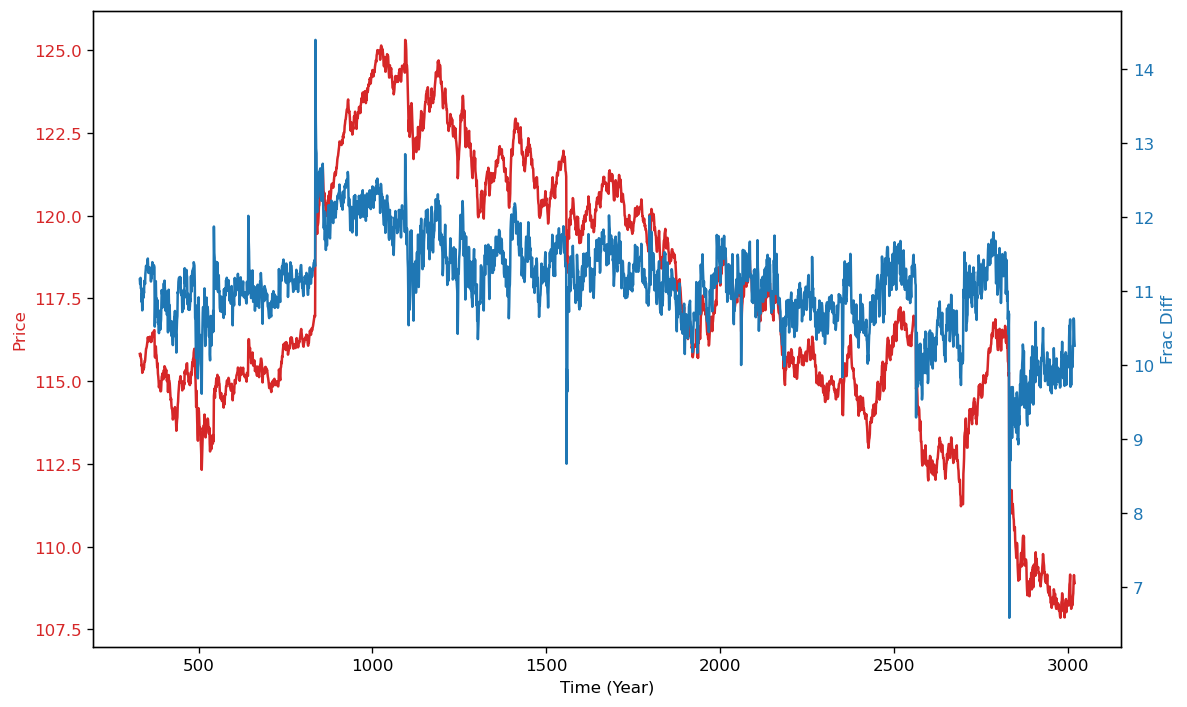

In [12]:
plt.rcParams.update({'figure.figsize': (10, 6), 'figure.dpi': 120})
column = 'Close'
plot_size = len(frac_df)
d1 = aapl_105[column].values
d2 = frac_df[column].values

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time (Year)')
ax1.set_ylabel('Price', color=color)
ax1.plot(range(len(d1)-plot_size, len(d1)), d1[-plot_size:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Frac Diff', color=color)
ax2.plot(range(len(d1)-plot_size, len(d1)), d2[-plot_size:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.tight_layout()
plt.show()